In [1]:

from bs4 import BeautifulSoup
import requests
import os
import pandas as pd
from io import StringIO

In [2]:
#https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d1950_c20210803.csv.gz

In [4]:
if __name__ == '__main__':
    url = requests.get('https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/').text
    soup = BeautifulSoup(url, 'html.parser')
    for link in soup.findAll("a"):
        current_link = link.get("href")
        if current_link.endswith('gz'):
            print('Found CSV: ' + current_link)
            print('Downloading %s' % current_link)

            
            try:
                response = requests.get('https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/%s' % current_link, stream=True)

            # Check if the request was successful (status code 200)
                if response.status_code == 200:
                    with open(os.path.basename(current_link), "wb") as handle:
                        for data in response.iter_content():
                            handle.write(data)
                    print('Download complete')
                else:
                    print(f'Failed to download {current_link}. Status code: {response.status_code}')

            except Exception as e:
                print(f'Error downloading {current_link}: {e}')

Found CSV: StormEvents_details-ftp_v1.0_d1950_c20210803.csv.gz
Download complete
Found CSV: StormEvents_details-ftp_v1.0_d1951_c20210803.csv.gz
Download complete
Found CSV: StormEvents_details-ftp_v1.0_d1952_c20210803.csv.gz
Download complete
Found CSV: StormEvents_details-ftp_v1.0_d1953_c20210803.csv.gz
Download complete
Found CSV: StormEvents_details-ftp_v1.0_d1954_c20210803.csv.gz
Download complete
Found CSV: StormEvents_details-ftp_v1.0_d1955_c20210803.csv.gz
Download complete
Found CSV: StormEvents_details-ftp_v1.0_d1956_c20210803.csv.gz
Download complete
Found CSV: StormEvents_details-ftp_v1.0_d1957_c20210803.csv.gz
Download complete
Found CSV: StormEvents_details-ftp_v1.0_d1958_c20210803.csv.gz
Download complete
Found CSV: StormEvents_details-ftp_v1.0_d1959_c20210803.csv.gz
Download complete
Found CSV: StormEvents_details-ftp_v1.0_d1960_c20210803.csv.gz
Download complete
Found CSV: StormEvents_details-ftp_v1.0_d1961_c20210803.csv.gz
Download complete
Found CSV: StormEvents_detai

In [3]:
data = {}
for i in range (1996, 2008):
    filename = f'StormEvents_details-ftp_v1.0_d{i}_c20220425.csv.gz'
    data[i] = pd.read_csv(filename, compression='gzip')

C:\Users\momom\AppData\Local\Temp\ipykernel_5568\1374575589.py:4: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data[i] = pd.read_csv(filename, compression='gzip')
C:\Users\momom\AppData\Local\Temp\ipykernel_5568\1374575589.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  data[i] = pd.read_csv(filename, compression='gzip')
C:\Users\momom\AppData\Local\Temp\ipykernel_5568\1374575589.py:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  data[i] = pd.read_csv(filename, compression='gzip')
C:\Users\momom\AppData\Local\Temp\ipykernel_5568\1374575589.py:4: DtypeWarning: Columns (29,34,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data[i] = pd.read_csv(filename, compression='gzip')


In [4]:
for i in [2010, 2015]:
    filename = f'StormEvents_details-ftp_v1.0_d{i}_c20220425.csv.gz'
    data[i] = pd.read_csv(filename, compression='gzip')

In [5]:
for i in [2009, 2014]:
    filename = f'StormEvents_details-ftp_v1.0_d{i}_c20231116.csv.gz'
    data[i] = pd.read_csv(filename, compression='gzip')

In [6]:
for i in [2009, 2014]:
    filename = f'StormEvents_details-ftp_v1.0_d{i}_c20231116.csv.gz'
    data[i] = pd.read_csv(filename, compression='gzip')

In [7]:
for i in range (2020, 2022):
    filename = f'StormEvents_details-ftp_v1.0_d{i}_c20231217.csv.gz'
    data[i] = pd.read_csv(filename, compression='gzip')

In [8]:
for i in [2019, 2023]:
    filename = f'StormEvents_details-ftp_v1.0_d{i}_c20240117.csv.gz'
    data[i] = pd.read_csv(filename, compression='gzip')

In [9]:
data[2011] = pd.read_csv('StormEvents_details-ftp_v1.0_d2011_c20230417.csv.gz', compression='gzip')
data[2012] = pd.read_csv('StormEvents_details-ftp_v1.0_d2012_c20221216.csv.gz', compression='gzip')
data[2013] = pd.read_csv('StormEvents_details-ftp_v1.0_d2013_c20230118.csv.gz', compression='gzip')
data[2016] = pd.read_csv('StormEvents_details-ftp_v1.0_d2016_c20220719.csv.gz', compression='gzip')
data[2017] = pd.read_csv('StormEvents_details-ftp_v1.0_d2017_c20230317.csv.gz', compression='gzip')
data[2018] = pd.read_csv('StormEvents_details-ftp_v1.0_d2018_c20230616.csv.gz', compression='gzip')

In [10]:
# Concatenate all DataFrames vertically into a single DataFrame
merged_df = pd.concat(data.values(), ignore_index=True)

# Optionally, you can sort the DataFrame by the date column
merged_df.sort_values(by='BEGIN_YEARMONTH', inplace=True)

# Reset index if needed
merged_df.reset_index(drop=True, inplace=True)
merged_df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,199601,27,1520,199601,27,1520,2032878.0,5544290,HAWAII,15.0,...,5.0,SE,HILO,NaN,NaN,NaN,NaN,Funnel cloud southeast of Hilo Airport.,NaN,PDC
1,199601,17,1000,199601,18,400,2402913.0,5537559,SOUTH DAKOTA,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Two to ten inches of snow, high winds from 40 ...",NaN,PDC
2,199601,26,800,199601,26,2000,2404241.0,5535959,NEBRASKA,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An intense winter storm produced near blizzard...,NaN,PDC
3,199601,1,1800,199601,1,2300,2404516.0,5535828,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An upper level disturbance moved across northe...,NaN,PDC
4,199601,26,800,199601,26,2000,2404241.0,5535954,NEBRASKA,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An intense winter storm produced near blizzard...,NaN,PDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491986,202310,10,0,202310,16,2359,186616.0,1145190,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two areas of heavy rainfall associated with th...,Rainfall estimated and measured at 0.5 to 1 in...,CSV
1491987,202310,20,1454,202310,20,1855,186560.0,1144910,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Above normal temperatures and continued lack o...,Texas A&M Incident Report.,CSV
1491988,202310,2,1234,202310,2,1604,186266.0,1143281,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An upper level trough out of the Great Basin a...,Texas A&M Forest Service Incident Report Record.,CSV
1491989,202310,26,739,202310,26,747,186386.0,1144584,TEXAS,48.0,...,2.0,N,CIBOLO KARDYS ARPT,29.5774,-98.2526,29.6055,-98.2432,Thunderstorms developed along an outflow bound...,A National Weather Service damage survey along...,CSV


In [13]:
pd.set_option('display.max_columns', None)
merged_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,199601,27,1520,199601,27,1520,2032878.0,5544290,HAWAII,15.0,1996,January,Funnel Cloud,C,1,HAWAII,HFO,27-JAN-96 15:20:00,HST,27-JAN-96 15:20:00,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,SE,HILO,5.0,SE,HILO,NaN,NaN,NaN,NaN,Funnel cloud southeast of Hilo Airport.,NaN,PDC
1,199601,17,1000,199601,18,400,2402913.0,5537559,SOUTH DAKOTA,46.0,1996,January,Blizzard,Z,15,DEWEY,ABR,17-JAN-96 10:00:00,CST,18-JAN-96 04:00:00,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Two to ten inches of snow, high winds from 40 ...",NaN,PDC
2,199601,26,800,199601,26,2000,2404241.0,5535959,NEBRASKA,31.0,1996,January,Winter Storm,Z,93,RICHARDSON,OAX,26-JAN-96 08:00:00,CST,26-JAN-96 20:00:00,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An intense winter storm produced near blizzard...,NaN,PDC
3,199601,1,1800,199601,1,2300,2404516.0,5535828,TEXAS,48.0,1996,January,Heavy Snow,Z,91,MONTAGUE,FWD,01-JAN-96 18:00:00,CST,01-JAN-96 23:00:00,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An upper level disturbance moved across northe...,NaN,PDC
4,199601,26,800,199601,26,2000,2404241.0,5535954,NEBRASKA,31.0,1996,January,Winter Storm,Z,88,JEFFERSON,OAX,26-JAN-96 08:00:00,CST,26-JAN-96 20:00:00,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An intense winter storm produced near blizzard...,NaN,PDC


In [15]:
storm_simple = merged_df[['YEAR', 'EPISODE_ID', 'EVENT_ID', 'EVENT_TYPE', 'STATE']].copy()
storm_simple

,YEAR,EPISODE_ID,EVENT_ID,EVENT_TYPE,STATE
0,1996,2032878.0,5544290,Funnel Cloud,HAWAII
1,1996,2402913.0,5537559,Blizzard,SOUTH DAKOTA
2,1996,2404241.0,5535959,Winter Storm,NEBRASKA
3,1996,2404516.0,5535828,Heavy Snow,TEXAS
4,1996,2404241.0,5535954,Winter Storm,NEBRASKA
...,...,...,...,...,...
1491986,2023,186616.0,1145190,Drought,TEXAS
1491987,2023,186560.0,1144910,Wildfire,TEXAS
1491988,2023,186266.0,1143281,Wildfire,TEXAS
1491989,2023,186386.0,1144584,Tornado,TEXAS


In [17]:
storm_basic = merged_df[['YEAR', 'EVENT_TYPE']]
storm_basic

,YEAR,EVENT_TYPE
0,1996,Funnel Cloud
1,1996,Blizzard
2,1996,Winter Storm
3,1996,Heavy Snow
4,1996,Winter Storm
...,...,...
1491986,2023,Drought
1491987,2023,Wildfire
1491988,2023,Wildfire
1491989,2023,Tornado


In [20]:
storm_counts = storm_basic.groupby(['YEAR', 'EVENT_TYPE']).size().reset_index(name='EVENT_COUNT')
storm_counts

,YEAR,EVENT_TYPE,EVENT_COUNT
0,1996,Avalanche,7
1,1996,Blizzard,1431
2,1996,Coastal Flood,201
3,1996,Cold/Wind Chill,2578
4,1996,Debris Flow,24
...,...,...,...
1135,2023,Volcanic Ashfall,7
1136,2023,Waterspout,210
1137,2023,Wildfire,281
1138,2023,Winter Storm,2178


In [23]:
yr1 = storm_counts[storm_counts['YEAR'] == 1996]
yr1

,YEAR,EVENT_TYPE,EVENT_COUNT
0,1996,Avalanche,7
1,1996,Blizzard,1431
2,1996,Coastal Flood,201
3,1996,Cold/Wind Chill,2578
4,1996,Debris Flow,24
5,1996,Dense Fog,272
6,1996,Drought,772
7,1996,Dust Devil,11
8,1996,Dust Storm,6
9,1996,Flash Flood,3325


In [24]:
spec_events = ['Coastal Flood', 'Drought', 'Flash Flood', 'Flood', 'Heavy Rain', 'High Surf', 'Hurricane (Typhoon)', 'Storm Surge/Tide', 'Tropical Storm']
storm_focus = storm_counts[storm_counts['EVENT_TYPE'].isin(spec_events)]
storm_focus

,YEAR,EVENT_TYPE,EVENT_COUNT
2,1996,Coastal Flood,201
6,1996,Drought,772
9,1996,Flash Flood,3325
10,1996,Flood,2218
16,1996,Heavy Rain,635
...,...,...,...
1103,2023,Flood,2488
1109,2023,Heavy Rain,807
1111,2023,High Surf,103
1129,2023,Storm Surge/Tide,30


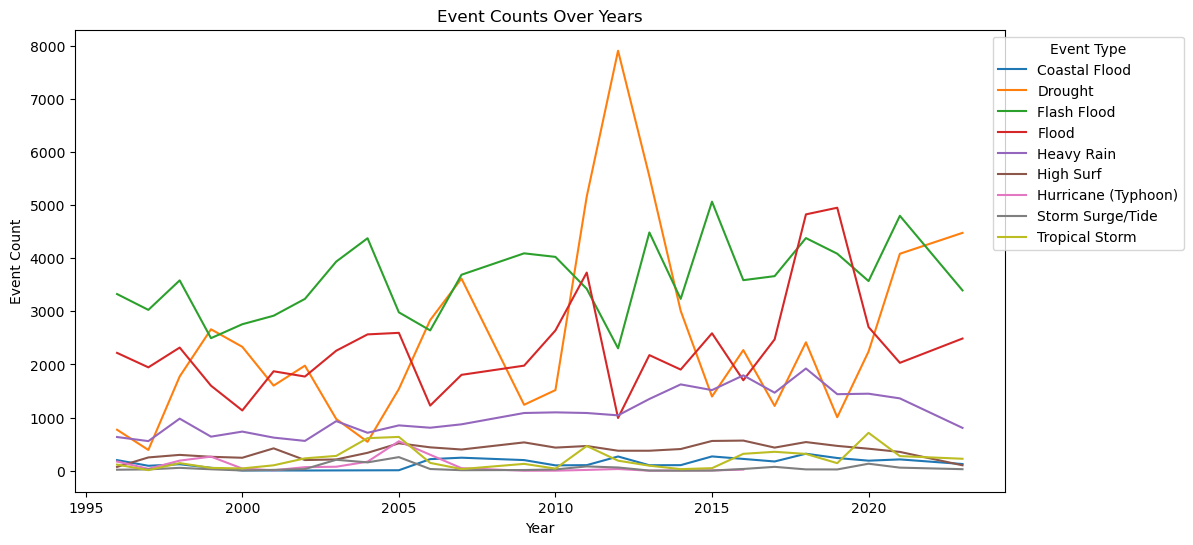

In [25]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'storm_counts' is your DataFrame with 'YEAR', 'EVENT_TYPE', and 'EVENT_COUNT' columns
# If your DataFrame is named differently, replace 'storm_counts' with your actual DataFrame name

# Use seaborn's lineplot to plot multiple lines
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='EVENT_COUNT', hue='EVENT_TYPE', data=storm_focus)
plt.title('Event Counts Over Years')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.legend(title='Event Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

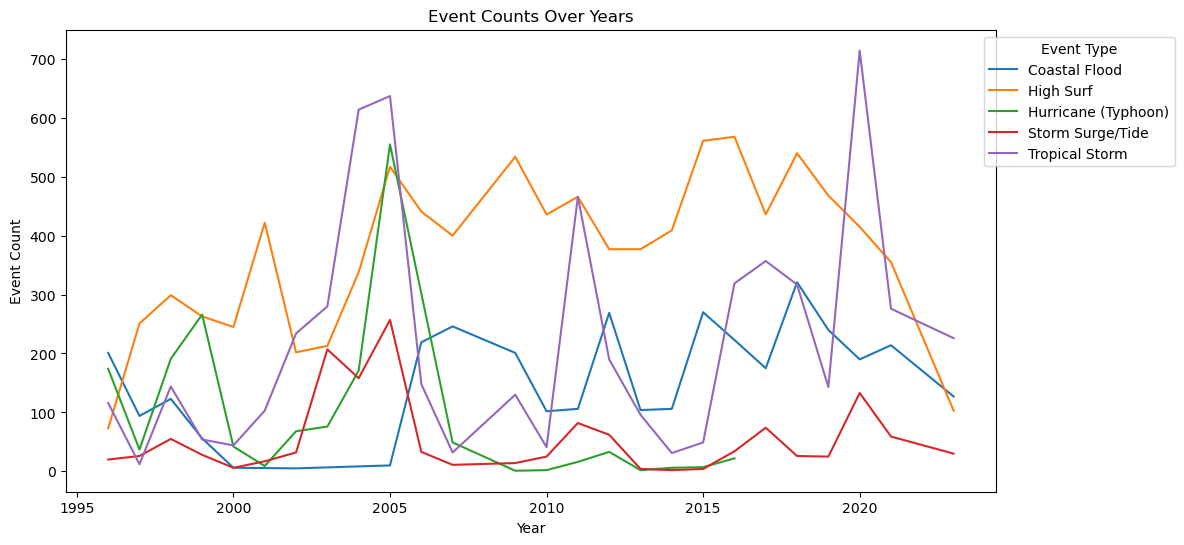

In [26]:
small_events = ['Coastal Flood', 'High Surf', 'Hurricane (Typhoon)', 'Storm Surge/Tide', 'Tropical Storm']
storm_small = storm_counts[storm_counts['EVENT_TYPE'].isin(small_events)]
# Use seaborn's lineplot to plot multiple lines
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='EVENT_COUNT', hue='EVENT_TYPE', data=storm_small)
plt.title('Event Counts Over Years')
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.legend(title='Event Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [9]:
url2 = requests.get('https://www.aoml.noaa.gov/hrd/hurdat/hurdat2.html').text
# Use StringIO to create a file-like object for pd.read_csv
#csv_file_like = StringIO(url2)

#try:
    #hurr_df = pd.read_csv(csv_file_like)
    # Display the DataFrame
    #print(hurr_df)
#except pd.errors.ParserError as e:
    #print(f"Error reading CSV: {e}")

print(url2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

